In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import List

In [163]:
rand = np.random.RandomState(0)

# Vehicle configuration:

| Vehicle    | Capacity | Cost          |
|------------|----------|---------------|
| Type A (1) | 25       | RM 1.2 per km |
| Type B (2) | 30       | RM 1.5 per km |


In [164]:
v1_cap = 25
v1_cost = 1.2

v2_cap = 30
v2_cost = 1.5

In [165]:
# get customer data
customer_data = pd.read_csv("data.csv")
customer_data

,Customer,Latitude,Longitude,Demand
0,1,4.3555,113.9777,5
1,2,4.3976,114.0049,8
2,3,4.3163,114.0764,3
3,4,4.3184,113.9932,6
4,5,4.4024,113.9896,5
5,6,4.4142,114.0127,8
6,7,4.4804,114.0734,3
7,8,4.3818,114.2034,6
8,9,4.4935,114.1828,5
9,10,4.4932,114.1322,8


In [166]:
# get number of customers
n_customers = len(customer_data.index)
n_customers

10

In [167]:
depot_coordinates = [114.0932, 4.4184]
depot_coordinates

[114.0932, 4.4184]

In [168]:
# get the coordinates of the customers in X, Y format
coordinates = customer_data[["Longitude", "Latitude"]].values.tolist()

# add the depot coordinates to the coordinates array as the first row
coordinates.insert(0, depot_coordinates)

coordinates 

[[114.0932, 4.4184],
 [113.9777, 4.3555],
 [114.0049, 4.3976],
 [114.0764, 4.3163],
 [113.9932, 4.3184],
 [113.9896, 4.4024],
 [114.0127, 4.4142],
 [114.0734, 4.4804],
 [114.2034, 4.3818],
 [114.1828, 4.4935],
 [114.1322, 4.4932]]

In [169]:
# get customer demands
demands = customer_data["Demand"].values.tolist()

# add the depot demand to the demands array as the first element
demands.insert(0, 0)

demands

[0, 5, 8, 3, 6, 5, 8, 3, 6, 5, 8]

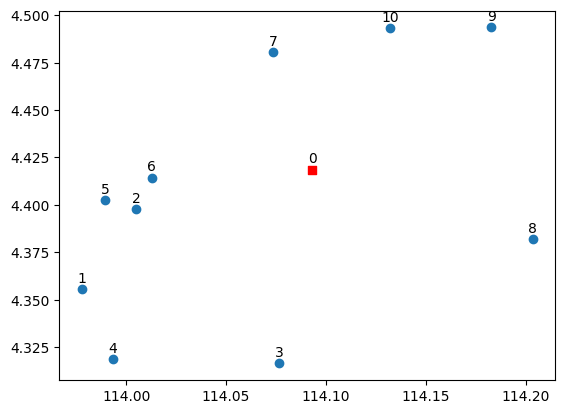

In [170]:
# visualize the customers and depot
plt.scatter(coordinates[0][0], coordinates[0][1], color='r', marker='s') 
plt.scatter([c[0] for c in coordinates[1:]], [c[1] for c in coordinates[1:]])

for i, _ in enumerate(coordinates):
    plt.annotate(i, (coordinates[i][0], coordinates[i][1]), textcoords="offset points", xytext=(0, 5), ha='center')

In [171]:
# # get distance matrix for the coordinates
matrix_size = n_customers + 1
dist_mat = np.zeros((matrix_size, matrix_size))
for i in range(matrix_size):        # for each location
    for j in range(matrix_size):
        dist_mat[i, j] = np.hypot(coordinates[i][0] - coordinates[j][0], coordinates[i][1] - coordinates[j][1]) * 100
    
print('\n'.join([' '.join(["%-10s" % f"{dist:.5f}" for dist in row]) for row in dist_mat]))

0.00000    13.15168   9.07168    10.34729   14.14214   10.48282   8.06095    6.50849    11.61189   11.69109   8.43566   
13.15168   0.00000    5.01224    10.61995   4.02077    4.83862    6.83424    15.73483   22.72272   24.72044   20.69578  
9.07168    5.01224    0.00000    10.82679   8.00595    1.60353    1.83412    10.74620   19.91278   20.21020   15.92000  
10.34729   10.61995   10.82679   0.00000    8.32265    12.22598   11.67994   16.41274   14.28959   20.66901   18.54919  
14.14214   4.02077    8.00595    8.32265    0.00000    8.40771    9.77645    18.07652   21.95532   25.80856   22.33294  
10.48282   4.83862    1.60353    12.22598   8.40771    0.00000    2.59394    11.44834   21.47901   21.36011   16.90544  
8.06095    6.83424    1.83412    11.67994   9.77645    2.59394    0.00000    8.98161    19.34328   18.76766   14.32524  
6.50849    15.73483   10.74620   16.41274   18.07652   11.44834   8.98161    0.00000    16.31624   11.01815   6.01771   
11.61189   22.72272   19.91278  

In [172]:
final_v1_cost_matrix = dist_mat * v1_cost
final_v2_cost_matrix = dist_mat * v2_cost

print('\n'.join([' '.join(["%-10s" % f"{dist:.5f}" for dist in row]) for row in final_v1_cost_matrix]))
print("-" * 150)
print('\n'.join([' '.join(["%-10s" % f"{dist:.5f}" for dist in row]) for row in final_v2_cost_matrix]))

0.00000    15.78201   10.88601   12.41675   16.97056   12.57939   9.67314    7.81018    13.93427   14.02931   10.12279  
15.78201   0.00000    6.01468    12.74394   4.82493    5.80634    8.20109    18.88180   27.26726   29.66453   24.83494  
10.88601   6.01468    0.00000    12.99215   9.60714    1.92423    2.20095    12.89544   23.89534   24.25224   19.10400  
12.41675   12.74394   12.99215   0.00000    9.98718    14.67117   14.01593   19.69529   17.14751   24.80281   22.25903  
16.97056   4.82493    9.60714    9.98718    0.00000    10.08925   11.73174   21.69182   26.34638   30.97027   26.79953  
12.57939   5.80634    1.92423    14.67117   10.08925   0.00000    3.11272    13.73800   25.77482   25.63214   20.28653  
9.67314    8.20109    2.20095    14.01593   11.73174   3.11272    0.00000    10.77793   23.21194   22.52119   17.19029  
7.81018    18.88180   12.89544   19.69529   21.69182   13.73800   10.77793   0.00000    19.57948   13.22178   7.22125   
13.93427   27.26726   23.89534  

In [173]:
def calc_fitness(route: List[int], 
                 cost_matrix: np.ndarray, 
                 demands: np.ndarray
                 ) -> float:
    """
    Get fitness of a route based on (cost of delivery / goods delivered)
    
    Lower fitness value is better
    """
    
    cost_of_delivery = sum(cost_matrix[i, j] for i, j in zip(route[:-1], route[1:]))
    goods_delivered = sum(demands[i] for i in route[1:-1])

    return cost_of_delivery / goods_delivered

In [174]:
def tournament_selection(population: List[List[int]], 
                         cost_matrix: np.ndarray, 
                         demands: np.ndarray, 
                         tournament_size: int,
                         selected_percentage: float,
                         probability: float
                         ) -> List[List[int]]:
    """
    Select the best route from a tournament
    
    Parameters
    ----------
    population : List[List[int]]
        List of routes
    cost_matrix : np.ndarray
        Cost matrix
    demands : np.ndarray
        Demands of customers
    tournament_size : int
        Number of routes in a tournament
    selected_percentage : float
        Percentage of the population to be chosen as the best routes
    probability : float
        Probability of selecting the best route in a tournament
    
    Returns 
    -------
    The best routes from the tournaments
    """
    # get the number of routes to be selected
    tournament_output_size = int(len(population) * selected_percentage)
    
    best_routes = []
    
    for _ in range(tournament_output_size):
        # get random routes from the population
        random_choice = rand.choice(len(population), size=tournament_size, replace=False)
        tournament = [population[i] for i in random_choice]
        
        # get a random probability
        rand_prob = rand.rand()
        
        # select the best route based on the probability
        if rand_prob < probability:     # best route
            best_routes.append(min(tournament, key=lambda route: calc_fitness(route, cost_matrix, demands)))
            
        elif rand_prob - probability < probability * (1 - probability):       # second best route
            best_routes.append(sorted(tournament, key=lambda route: calc_fitness(route, cost_matrix, demands))[1])
            
        else:       # third best route
            best_routes.append(sorted(tournament, key=lambda route: calc_fitness(route, cost_matrix, demands))[2])
    
    return best_routes

In [175]:
def fill_route(route: List[int],
               n_customers: int
              ) -> List[int]:
    """
    Fill a route with randomized customers if it is not full
    
    Parameters
    ----------
    route : List[int]
        Route to fill
    n_customers : int
        Number of customers
    
    Returns
    -------
    Filled route
    """
    filled_route = route.copy()
    
    # remove the depot if it is at the end of the route
    if filled_route[-1] == 0:
        filled_route = filled_route[:-1]
    
    # fill the route with random customers if it is not full
    if len(filled_route) < n_customers + 1:    # +1 for the depot
        remaining_customers = [i for i in range(1, n_customers+1) if i not in filled_route]
        
        # shuffle the remaining customers and add them to the route
        filled_route.extend(rand.choice(remaining_customers, size=len(remaining_customers), replace=False))

    filled_route.append(0)
    
    return filled_route


def trim_route(route: List[int],
               demands: np.ndarray,
               capacity: int
               ) -> List[int]:
    """
    Trim a route to satisfy the capacity constraint
    
    Parameters
    ----------
    route : List[int]
        Route to trim
    demands : np.ndarray
        Demands of customers
    capacity : int
        Capacity of the vehicle
    
    Returns
    -------
    Trimmed route
    """
    trimmed_route = []
    current_capacity = 0
    
    for customer in route:
        # continue adding customers to the route until the capacity is reached or exceeded
        if current_capacity + demands[customer] <= capacity:
            trimmed_route.append(customer)
            current_capacity += demands[customer]
        else:
            break
    
    # add the depot to the end of the route if it is not already there
    if trimmed_route[-1] != 0:
        trimmed_route.append(0)
    
    return trimmed_route



def helper_crossover(route1: List[int],
                     route2: List[int],
                     demands: np.ndarray,
                     capacity: int
                     ) -> List[int]:
    """
    Helper function for crossover
    
    Parameters
    ----------
    route1 : List[int]
        First route
    route2 : List[int]
        Second route
    demands : np.ndarray
        Demands of customers
    capacity : int
        Capacity of the vehicle
    
    Returns
    -------
    New chlid route
    """
    new_route = []
    crossed = False
    
    # add elements from route1 to the new route until an element from route2 is encountered
    for i in range(len(route1)):
        new_route.append(route1[i])
        if route1[i] in route2:
            crossed = True
            break
    
    if crossed:
        # last element in route2 excluding the depot (which is at the end)
        if route2.index(new_route[-1]) == len(route2) - 2:   
            # basically start from depot and add all elements in route2
            path = route2[1:]

        else:
            # start from the element after the last element in route2 and add all elements in route2, excluding the depot
            path = route2[route2.index(new_route[-1]) + 1:-1] + route2[1:route2.index(new_route[-1])]
        
        # add elements from route2 to the new route
        for i in path:
            if i not in new_route:
                new_route.append(i)
            else:
                break
    
    # fill and trim the new route
    new_route = fill_route(new_route, len(demands) - 1)
    new_route = trim_route(new_route, demands, capacity)
    
    return new_route


def crossover(best_routes: List[List[int]],
              demands: np.ndarray,
              capacity: int,
              population_size: int
              ) -> List[List[int]]:
    """
    Perform crossover on selected routes
    
    Parameters
    ----------
    selected_routes : List[List[int]]
        List of selected routes
    cost_matrix : np.ndarray
        Cost matrix
    demands : np.ndarray
        Demands of customers
    
    Returns
    -------
    List of new routes
    """
    new_routes = []
    
    # keep adding new routes until the population size is reached
    while len(new_routes) < population_size -  len(best_routes):
        # choose 2 random routes from the best routes (parents)
        random_choice = rand.choice(len(best_routes), size=2, replace=False)    
        route1, route2 = (best_routes[i] for i in random_choice)
        
        new_routes.append(helper_crossover(route1, route2, demands, capacity))
        new_routes.append(helper_crossover(route2, route1, demands, capacity))
            
    return new_routes + best_routes

In [176]:
def inversion_mutation(population: List[List[int]],
                       mutation_probability: float = 0.01
                      ) -> List[List[int]]:
    """
    Perform inversion mutation on the population
    
    Parameters
    ----------
    population : List[List[int]]
        List of routes
    mutation_probability : float
        Probability of mutation
    
    Returns
    -------
    Mutated population
    """
    mutated_population = []
    
    for route in population:
        # mutate if the random probability is less than the mutation probability
        if rand.rand() < mutation_probability:
            start = rand.randint(1, len(route) - 2)     # exclude the depot at the start and end, and the last element
            end = rand.randint(start + 1, len(route))
            
            scrambled = route.copy()
            
            scrambled[start:end] = scrambled[start:end][::-1]
            
            mutated_population.append(scrambled)
            
        else:
            mutated_population.append(route)
    
    return mutated_population

In [177]:
def evolve_population(vehicle_type: str,
                      population_size: int,
                      n_generations: int,
                      cost_matrix: np.ndarray,
                      demands: np.ndarray,
                      capacity: int,
                      tournament_size: int,
                      selected_percentage: float,
                      selected_probability: float,
                      mutation_probability: float
                      ) -> List[int]:
    """
    Evolve the population
    
    Parameters
    ----------
    population_size : int
        Size of the population
    n_generations : int
        Number of generations
    cost_matrix : np.ndarray
        Cost matrix of the vehicle
    demands : np.ndarray
        Demands of customers
    capacity : int
        Capacity of the vehicle
    tournament_size : int
        Number of routes in a tournament
    selected_percentage : float
        Percentage of the population to be chosen as the best routes
    selected_probability : float
        Probability of selecting the best route in a tournament
    mutation_probability : float
        Probability of mutation
    
    Returns
    -------
    The best route
    """
    # generate random routes
    random_routes = [rand.permutation(range(1,len(demands))) for _ in range(population_size)]
    population = [[0] + list(route) + [0] for route in random_routes]
    
    # trim the routes to satisfy the capacity constraint
    for i, route in enumerate(population):
        population[i] = trim_route(route, demands, capacity)
    
    # evolve the population
    for gen in range(n_generations):
        best_routes = tournament_selection(population=population,
                                           cost_matrix=cost_matrix, 
                                           demands=demands, 
                                           tournament_size=tournament_size, 
                                           selected_percentage=selected_percentage, 
                                           probability=selected_probability)
        
        crossed = crossover(best_routes=best_routes,
                            demands=demands,
                            capacity=capacity,
                            population_size=population_size)
        
        mutated = inversion_mutation(population=crossed, mutation_probability=mutation_probability)
        
        population = mutated
        
        print(f"\rVechicle {vehicle_type}: Generation {gen+1} done", end="", flush=True)
    
    print()
    return min(population, key=lambda route: calc_fitness(route, cost_matrix, demands))

In [178]:
# setup variables to be used after each delivery cycle
customers_remaining = [i for i in range(1, n_customers+1)]
best_routes = []
mapping = {i:i for i in range(n_customers+1)}
sub_coords = coordinates[:]
sub_demands = demands[:]

# while there are still customers to be served
while len(customers_remaining) > 0:
    customers_left = len(customers_remaining)
    
    # get distance matrix for the coordinates
    matrix_size = customers_left + 1
    mat = np.zeros((matrix_size, matrix_size))
    for i in range(matrix_size):        # for each location
        for j in range(matrix_size):
            mat[i, j] = np.hypot(coordinates[i][0] - coordinates[j][0], coordinates[i][1] - coordinates[j][1]) * 100
    
    # get the cost matrix for the vehicles
    v1_cost_matrix = mat * v1_cost
    v2_cost_matrix = mat * v2_cost
    
    # evolve the population for each vehicle
    best_route1 = evolve_population(vehicle_type="A",
                                    population_size=100,
                                    n_generations=1000,
                                    cost_matrix=v1_cost_matrix,
                                    demands=sub_demands,
                                    capacity=v1_cap,
                                    tournament_size=16,
                                    selected_percentage=0.2,
                                    selected_probability=0.9,
                                    mutation_probability=0.05)
    
    best_route2 = evolve_population(vehicle_type="B",
                                    population_size=100,
                                    n_generations=1000,
                                    cost_matrix=v2_cost_matrix,
                                    demands=sub_demands,
                                    capacity=v2_cap,
                                    tournament_size=16,
                                    selected_percentage=0.2,
                                    selected_probability=0.9,
                                    mutation_probability=0.05)
    
    # get the fitness of the routes
    fitness1 = calc_fitness(best_route1, v1_cost_matrix, demands)
    fitness2 = calc_fitness(best_route2, v2_cost_matrix, demands)
    
    # add the best route to the best routes list
    if fitness1 < fitness2:
        best_route1 = [mapping[i] for i in best_route1]
        best_routes.append({"Vehicle": "A",
                            "Route": best_route1})
        customers_remaining = [i for i in customers_remaining if i not in best_route1]
        
    else:
        best_route2 = [mapping[i] for i in best_route2]
        best_routes.append({"Vehicle": "B",
                            "Route": best_route2})
        customers_remaining = [i for i in customers_remaining if i not in best_route2]
        
    print(f"Fitness A: {fitness1}, Fitness B: {fitness2}")
    print(f"best_route: {best_routes[-1]}\n")
    
    # update variables to be used in the next delivery cycle
    mapping = {i: j for i, j in enumerate(customers_remaining, start=1)}
    mapping[0] = 0
    sub_coords = [coordinates[0]] + [coordinates[i] for i in customers_remaining]
    sub_demands = [demands[0]] + [demands[i] for i in customers_remaining]
    

print("All customers have been served\n")
print(f"Best routes: {best_routes}")
    

Vechicle A: Generation 1000 done
Vechicle B: Generation 1000 done
Fitness A: 1.2188621355110758, Fitness B: 2.337155652827114
best_route: {'Vehicle': 'A', 'Route': [0, 6, 5, 2, 0]}

Vechicle A: Generation 1000 done
Vechicle B: Generation 1000 done
Fitness A: 1.4379617025178622, Fitness B: 1.796968558189514
best_route: {'Vehicle': 'A', 'Route': [0, 10, 9, 8, 3, 0]}

Vechicle A: Generation 1000 done
Vechicle B: Generation 1000 done
Fitness A: 2.6288364954905137, Fitness B: 3.286045619363142
best_route: {'Vehicle': 'A', 'Route': [0, 4, 1, 7, 0]}

All customers have been served

Best routes: [{'Vehicle': 'A', 'Route': [0, 6, 5, 2, 0]}, {'Vehicle': 'A', 'Route': [0, 10, 9, 8, 3, 0]}, {'Vehicle': 'A', 'Route': [0, 4, 1, 7, 0]}]


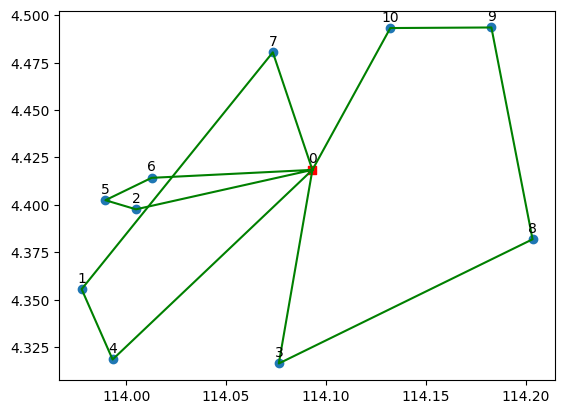

In [179]:
# plot the best routes
plt.scatter(coordinates[0][0], coordinates[0][1], color='r', marker='s') 
plt.scatter([c[0] for c in coordinates[1:]], [c[1] for c in coordinates[1:]])

for i, _ in enumerate(coordinates):
    plt.annotate(i, (coordinates[i][0], coordinates[i][1]), textcoords="offset points", xytext=(0, 5), ha='center')
    
for route in best_routes:
    plt.plot([coordinates[c][0] for c in route["Route"]], [coordinates[c][1] for c in route["Route"]], color='g' if route["Vehicle"] == "A" else 'b')

In [180]:
total_distance = 0
total_cost = 0

# print the best routes
for v, route in enumerate(best_routes):
    print(f"Vehicle{v+1} (Type {route['Vehicle']}): ")
    round_trip_distance = 0
    round_trip_cost = 0
    demand = 0
    route_list = ["Depot"]
    for i in range(len(route["Route"]) - 1):
        distance = dist_mat[route["Route"][i], route["Route"][i+1]]
        round_trip_distance += distance
        route_list.append((f"C{route['Route'][i+1]}" if route['Route'][i+1] != 0 else "Depot") +  f" ({distance:.3f} km)")
        
        if route["Vehicle"] == "A":
            round_trip_cost += final_v2_cost_matrix[route["Route"][i], route["Route"][i+1]]
        else:
            round_trip_cost += final_v2_cost_matrix[route["Route"][i], route["Route"][i+1]]
            
        demand += demands[route["Route"][i]]
        
    total_distance += round_trip_distance
    total_cost += round_trip_cost
    
    print(f"Distance : {round_trip_distance:.3f} km")
    print(f"Cost     : RM {round_trip_cost:.2f}")
    print(f"Demand   : {demand}")
    print(f"Route    : {" -> ".join(route_list)}\n")


print("=" * 50)
print(f"Total Distance : {total_distance:.3f} km")
print(f"Total Cost     : RM {total_cost:.3f}")



Vehicle1 (Type A): 
Distance : 21.330 km
Cost     : RM 32.00
Demand   : 21
Route    : Depot -> C6 (8.061 km) -> C5 (2.594 km) -> C2 (1.604 km) -> Depot (9.072 km)

Vehicle2 (Type A): 
Distance : 49.491 km
Cost     : RM 74.24
Demand   : 22
Route    : Depot -> C10 (8.436 km) -> C9 (5.060 km) -> C8 (11.358 km) -> C3 (14.290 km) -> Depot (10.347 km)

Vehicle3 (Type A): 
Distance : 40.406 km
Cost     : RM 60.61
Demand   : 14
Route    : Depot -> C4 (14.142 km) -> C1 (4.021 km) -> C7 (15.735 km) -> Depot (6.508 km)

Total Distance : 111.227 km
Total Cost     : RM 166.841
